# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

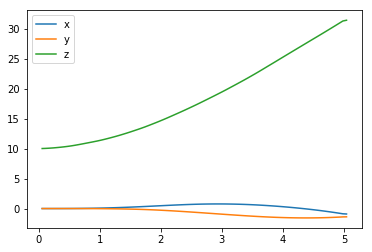

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

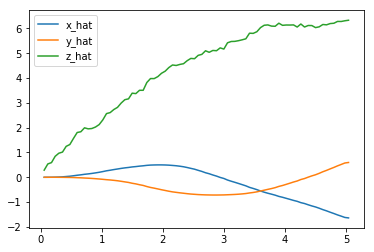

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

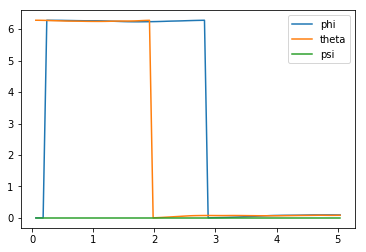

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

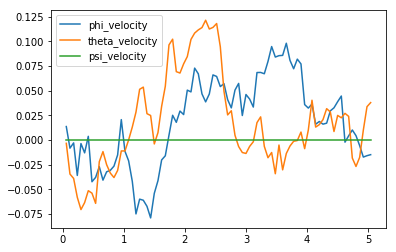

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

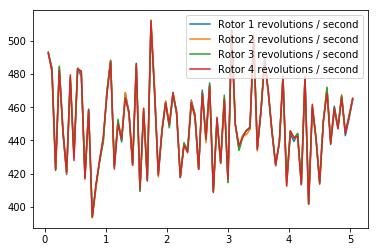

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -0.90785397  -1.38116829  31.39919657   0.09404743   0.08364431   0.        ]
[-1.63689713  0.59646246  6.3269437 ]
[-0.01479108  0.03801684  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [20]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])

task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -5.428 (best =  -3.714), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [2]:
    ## TODO: Plot the rewards.


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Note that the work products for this project are divided into two different attempts at a solution:

1. Actor/Critic system using the supplied DDPG code. Files include Quadcopter_Project_DDPG.ipynb, task_AC.py, agents/DDPGagent.py, agents/actor_128x256x128.py, and agents/critic_128x256.py

1. Deep Q-learning system which is a mashup of the code in this notebook and the code for the Deep Q-learning system used for the cart-pole exercise. Files include Quadcopter_Project_DQL.ipynb, task_DQL.py, agents/DQLagent.py, and agents/DQLnetwork.py.

**DDPG**

The executive summary is that I had such a frustrating time with this project. I started with the DDPG system using the code supplied by Udacity. I tried many different reward functions. At first I tried to get the agent to fly the copter from point A to point B. Then I found out that this was hard to do, and most people were just trying to get it to take off, and that previous versions of the project had a "hover" task. So my task designs got simpler and simpler over time, from traveling to a destination, to taking off, to simply hovering at a given location, to simply maintaining altitude, to even more simply maintaining level flight without flipping over! My experience with the quadcopter system was dominated by the extreme sensitivity of the system to variations of the rotor speeds with respect to each other. Over two substantially different agent designs, both encountered that a difference of as little as 1 Hz in rotor speeds between two rotors could cause the copter to pitch over or roll over (or both) in the span of a second or two.

One thing I did was to create a fifth control, which was a "main throttle" that commanded the central rotor speed value for all rotors, and then constrained the other four controls, one per rotor, to a very small range. This helped to reduce (but not eliminate) the problem.

The reward function was designed over time with different possible components:
1. a distance punishment e.g. -np.sum(np.square(pos-tgt_pos)) or -np.sum(np.abs(pos-tgt_pos))
1. a direction component reward, e.g. np.dot(rvec2tgt,task.sim.v)/(speed x dist2tgt)
1. a v_z component reward that would only operate at takeoff.
1. a high angle punishment e.g. -np.abs(phi) - np.abs(theta)
1. a punishment for crashing into a boundary (of which the ground is one) that exceeds any other punishment - at one point the network had learned that simply dropping to the ground was the least expensive option!

The plots in the first part of the DDPG notebook are a consequence of the last reward function. You can see that the reward function traces out a perfect tanh profile - in reverse - while the copter slowly flips over (the rotor differences were tightly constrained by the task.action_low and task.action_high values). Clearly the network never learned to counteract this effect, even though the reward function is clearly perfect for the job!

One critical aspect of this, I believe, is that I discovered a bug in the physics_sim.py file, particularly in the angle calculation, which may be part of the problem: 

        angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt ** 2

This line was itself the subject of a fix request that was only partially implemented in April: https://github.com/udacity/RL-Quadcopter-2/commit/a07525275a5732cacb66687e9d53f46b13aadc82

The problem is that "self.angular_accels" should not be squared! This is a Physics 101 equation, you can look it up if you want. I've already posted an issue on the Waffle board. I was told by a mentor that "the team" would look at it and get back to me, but they never did. I corrected the equation in my copy of the file. The effect of this correction is, for accelerations less than 1 rad/s/s, to increase the angles in the direction of the acceleration; for accel > 1 rad/s/s it would decrease the angles. So the fix may have made my simulation *more* sensitive to rotor differences.

This caused me to despair of any NN solution to a real-time control system - until I remembered the cart pole system, which succeeded in learning to keep the pole balanced. That was a deep Q-learning system, to which I now turn.

*Addendum* 

After getting the DQL system to work, I came back to the DDPG system and modified the task to have only one continuous control, being the main throttle that keeps all rotors locked at the same frequency. However, I was still unsuccessful in getting it to learn. It takes off, but doesn't level at the target altitude as did the DQL system. See the plots in the associated notebook.

**DQL**

The first order of business with the DQL solution was to discretize the action space. I tried several options, and as before, I ended up simplifying and simplifying the system to its bare essentials until it worked; to whit,
1. One control for the main throttle as before, with three possible speed values, low, medium, and high. The medium was intended to be somewhat close to the value necessary to maintain level flight. Then four controls, one for each rotor, with -1, 0, or +1 rps steps. This was based on my experience with the DDPG system. However, this leads to 3^5 = 283 possible actions!
1. So I reduced it by coupling rotors 0 and 1 for theta angle control and 2/3 for phi angle control, since the sim calculates torques in these directions based on these rotor pairings. That leaves 3^3 = 27 possible actions. This gave me a system that was almost manageable; however, it seems that trying to maintain level flight while simultaneously trying to achieve another goal was too much for the network - it could never seem to learn to do either. (See file task_DQL_withpitchandroll.py.)
1. So I "bit the bullet" and eliminated individual control of the rotors altogether. The DQL notebook now shows results for one "main throttle" control only. This completely restricts the copter to up/down motion. It can't move in x or y, and it can't pitch or roll. But in this configuration, finally, it shows its ability to learn. It can take off, and achieve altitude, and it can learn to toggle between two different rotor speeds in order to maintain altitude (hover). See the plots in the associated notebook. Both of those tasks now exist in file "task_DQL_nopitchroll.py", each with their own reward function, as follows:

   1. For takeoff, the difference in z |target_z - copter_z| is one component. The other is a direction component reward; one can see its effect in the plots when the copter reaches and then exceeds slightly the desired altitude; the direction component flips sign. Also a punishment for crashing as before.
   1. For hover, I only took away the direction component.

In the process, I also changed the "physics_sim.py" file so that the copter could take off from the ground (z=0). You have to check if the thrust+drag is sufficient to overcome gravity, and essentially zero out all other forces while on the ground. The sim now tells the difference between taking off and crashing back into the ground again. This means that my notebooks will ONLY work with my copy of the physics_sim.py file.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 

**DDPG**

The agent for the DDPG notebook is contained in agents/DDPGagent.py. As described above, I started with the actor/critic method using the code for the DDPG system lifted directly out of the lessons in this unit. Because the network wasn't learning, I tried to increase the size of the layers by a factor of four, from 32x64x32 to 128x256x128 for the actor and 32x64 to 128x256 for the critic. I also added batch normalization after the activations. I tried increasing the "tau" in the Q updates, and also the exploration sigma so that the network wouldn't get into a rut. None of these actions helped. Based on the performance over 200 episodes, it seemed likely that increasing the number of episodes would be a waste of time, particularly since, without a GPU, the training of this A/C system is painfully slow. Finally, as described above, I decided to switch to a Deep Q-learning system, since it has only one network, and so is conceptually simpler, faster to train, but most importantly because it demonstrated success with the cart-pole system.

*Addendum*

After getting the DQL system to work, I came back to the DDPG system and modified the agent to use the originally supplied layer sizes (16x32x16). I also played with the OUnoise parameters, having taken more time to understand them better. However, I was still unsuccessful in getting it to learn. It takes off, but doesn't level at the target altitude as did the DQL system. See the plots in the associated notebook.

**DQL**

The agent for the DQL notebook is contained in agents/DQLagent.py. The network architecture is defined in agents/DQLnetwork.py. The network was taken from the cart-pole system, a third fully connected layer was added, and the layers increased in size to 128, 256, and 128. All learning hyperparameters were maintained from the cart-pole system, although I played with $\alpha$ and $\epsilon$.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It is apparently an exceptionally difficult task to learn - although I read that other students apparently didn't have the same difficulty I did. I never got any useful tips from them, though. In brief, these agent DIDN'T learn over time until I simplified the problem to a point where it barely achieves practical usability. I am satisfied that the DQL agent at least learned to take off and hover in place, although my initial ambitions were higher. I don't frankly know how to put pitch and roll variability back in and still achieve the same goals.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I believe I have adequately expressed my frustration working on this project. My mentor couldn't answer any questions. He tagged other mentors to answer my questions, and the only thing they could say was "check this link for ways to design a reward function." Yeah, thanks. You guys pulled the mentors out of the forums, so I can't get regular help there anymore either. Your product quality is tanking here, guys. I should ask for part of my money back.